In [1]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GlobalMaxPooling1D, Reshape
from warnings import simplefilter,filterwarnings
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.io
import pickle
import glob
import sys
import gc
import os
import re
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# data_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/DataSet'
# code_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/Codes'
# results_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/Results'

In [2]:
data_path = "C:\\Users\\user\\Python_Anaconda\\task\\06\\DataSet"
results_path = "C:\\Users\\user\\Python_Anaconda\\task\\06\\Results"

In [3]:
Activity_map = {
    'LAYING': 0,
    'SITTING': 1,
    'STANDING': 2,

    'WALKING': 3,
    'WALKING_DOWNSTAIRS': 4,
    'WALKING_UPSTAIRS': 5,
}

In [4]:
test = pd.read_csv(os.path.join(data_path,"test.csv"))
# test['Activity'] = test['Activity'].map(Activity_map)
print(test.shape)
test.head()

(2947, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


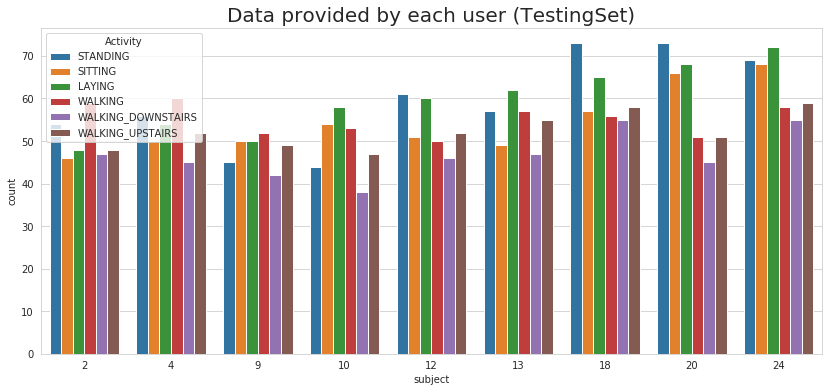

In [5]:
plt.figure(figsize=(14,6))
plt.title('Data provided by each user (TestingSet)', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = test)
plt.show()

In [7]:
for c, i in enumerate(list(set(test['subject'].tolist()))):
    print(50*"-")
    subject = test[test['subject']==i]
    number_of_samples = len(subject['subject'].tolist())
    print(f"{c} The Number of Samples for Subject number {i} : ", number_of_samples, "Number Of Activetes per day : ", number_of_samples//30)
    print(subject['Activity'].value_counts())

--------------------------------------------------
0 The Number of Samples for Subject number 2 :  302 Number Of Activetes per day :  10
WALKING               59
STANDING              54
LAYING                48
WALKING_UPSTAIRS      48
WALKING_DOWNSTAIRS    47
SITTING               46
Name: Activity, dtype: int64
--------------------------------------------------
1 The Number of Samples for Subject number 4 :  317 Number Of Activetes per day :  10
WALKING               60
STANDING              56
LAYING                54
WALKING_UPSTAIRS      52
SITTING               50
WALKING_DOWNSTAIRS    45
Name: Activity, dtype: int64
--------------------------------------------------
2 The Number of Samples for Subject number 9 :  288 Number Of Activetes per day :  9
WALKING               52
LAYING                50
SITTING               50
WALKING_UPSTAIRS      49
STANDING              45
WALKING_DOWNSTAIRS    42
Name: Activity, dtype: int64
--------------------------------------------------
3 

In [8]:
list(set(test['subject'].tolist()))

[2, 4, 9, 10, 12, 13, 18, 20, 24]

In [9]:
healthy1 = test[test['subject']==2]
Foot_pain = test[test['subject']==4]   # ألم بالأقدام
insomnia = test[test['subject']==9]   # أرق
healthy2 = test[test['subject']==10]
Obesity = test[test['subject']==12]   # بدانة
arthritis = test[test['subject']==13]   # التهاب مفاصل
Heart_and_blood_vessel_problems = test[test['subject']==18]   # مشاكل في القلب والأوعية الدموية
Bedsores = test[test['subject']==20]   # قرحة الفراش
Back_Pains = test[test['subject']==24]   # آلام الظهر

In [10]:
def sampling(row, ratios):
    for activity in ratios.keys():
        if row['Activity'] == activity:
            return False if ratios[activity]==0 else row.name % ratios[activity] == 0

In [11]:
Foot_pain = Foot_pain[Foot_pain.apply(sampling, args=({'LAYING':8, #
                                                       'STANDING':1,
                                                       'WALKING':1,
                                                       'WALKING_UPSTAIRS':0,
                                                       'SITTING':2,
                                                       'WALKING_DOWNSTAIRS':0},) , axis=1)]

insomnia = insomnia[insomnia.apply(sampling, args=({'LAYING':2,
                                                    'STANDING':4,
                                                    'WALKING':2,
                                                    'WALKING_UPSTAIRS':4,
                                                    'SITTING':2,
                                                    'WALKING_DOWNSTAIRS':4},) , axis=1)]

Obesity = Obesity[Obesity.apply(sampling, args=({'LAYING':1,
                                                  'STANDING':4,
                                                  'WALKING':16,
                                                  'WALKING_UPSTAIRS':0,
                                                  'SITTING':1,
                                                  'WALKING_DOWNSTAIRS':0},) , axis=1)]

arthritis = arthritis[arthritis.apply(sampling, args=({'LAYING':8, #
                                                       'STANDING':2,
                                                       'WALKING':2,
                                                       'WALKING_UPSTAIRS':1,
                                                       'SITTING':8, #
                                                       'WALKING_DOWNSTAIRS':1},) , axis=1)]

Heart_and_blood_vessel_problems = Heart_and_blood_vessel_problems[Heart_and_blood_vessel_problems.apply(sampling, args=({'LAYING':2,
                                                                                                                         'STANDING':2,
                                                                                                                         'WALKING':8, #
                                                                                                                         'WALKING_UPSTAIRS':0,
                                                                                                                         'SITTING':1,
                                                                                                                         'WALKING_DOWNSTAIRS':0},) , axis=1)]

Bedsores = Bedsores[Bedsores.apply(sampling, args=({'LAYING':1,
                                                   'STANDING':0,
                                                   'WALKING':0,
                                                   'WALKING_UPSTAIRS':0,
                                                   'SITTING':0,
                                                   'WALKING_DOWNSTAIRS':0},) , axis=1)]

Back_Pains = Back_Pains[Back_Pains.apply(sampling, args=({'LAYING':8, #
                                                          'STANDING':1,
                                                          'WALKING':8, #
                                                          'WALKING_UPSTAIRS':2,
                                                          'SITTING':8, #
                                                          'WALKING_DOWNSTAIRS':2},) , axis=1)]

In [12]:
new_test_dayaset = pd.concat([healthy1, Foot_pain, insomnia, healthy2, Obesity, arthritis, Heart_and_blood_vessel_problems, Bedsores, Back_Pains])

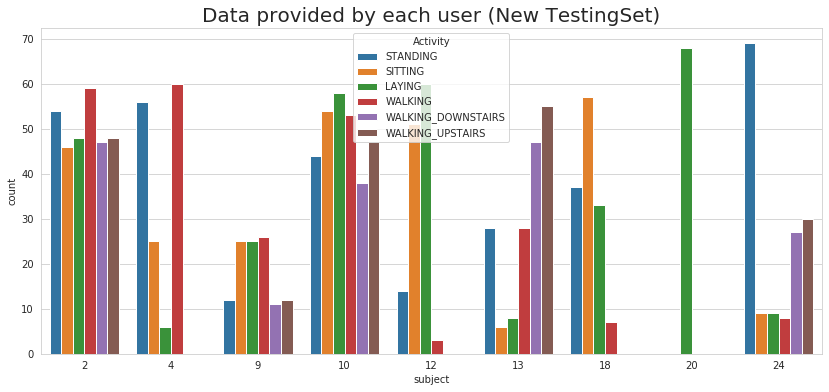

In [13]:
plt.figure(figsize=(14,6))
plt.title('Data provided by each user (New TestingSet)', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = new_test_dayaset)
plt.show()

In [14]:
new_test_dayaset.to_csv(os.path.join(data_path,"new_test_dayaset.csv"), index=False)

In [3]:
# pip install imblearn

In [ ]:
# from imblearn.over_sampling import SMOTE

# label_encoder = LabelEncoder()
# X = new_test_dayaset.drop('Activity', axis=1)
# y = np.array(new_test_dayaset['Activity'].tolist())
# y = label_encoder.fit_transform(y)
# # y_test_encoded = label_encoder.transform(y_test)
# y = to_categorical(y, 6)
# # X = X.values.reshape(-1, 1, X.shape[1])

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# y_resampled = np.argmax(y_resampled, axis=1)
# y_resampled = label_encoder.inverse_transform(y_resampled)
# X_resampled['Activity'] = y_resampled

# plt.figure(figsize=(14,6))
# plt.title('Data provided by each user (New TestingSet)', fontsize=20)
# sns.countplot(x='subject',hue='Activity', data = X_resampled)
# plt.show()